# Predicting Loan Defaults for LendingClub.com data 2007-2010

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [111]:
loans = pd.read_csv('loan_data.csv')

In [112]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [113]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [114]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [115]:
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [118]:
loans.rename(columns = {'credit.policy':'Meets Underwriting Requirements','not.fully.paid':'Not Paid to Date'},inplace=True)

### Plot of FICO scores based upon whether credit criteria was met for a loan

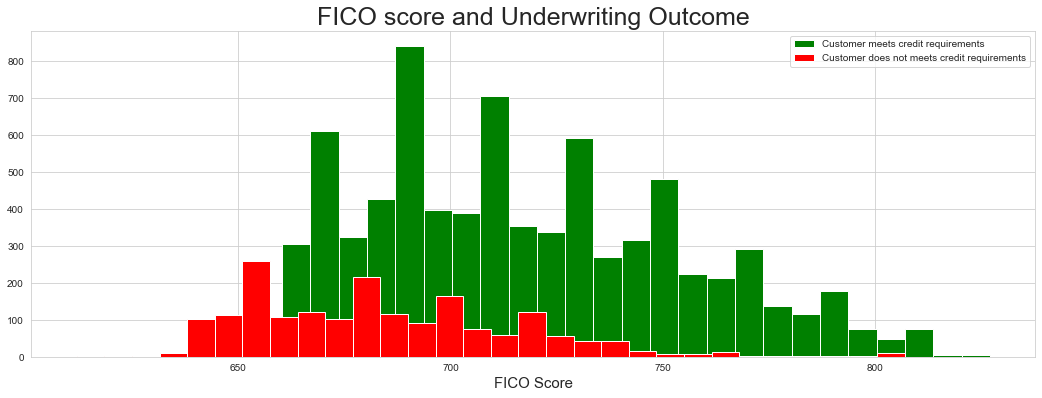

In [119]:
plt.figure(figsize=(18,6))
loans[loans['Meets Underwriting Requirements'] == 1]['fico'].hist(bins=30,color='green', label = 'Customer meets credit requirements')
loans[loans['Meets Underwriting Requirements'] == 0]['fico'].hist(bins=30,color='red', label = 'Customer does not meets credit requirements')
plt.xlabel('FICO Score', size=15)
plt.legend()
plt.title('FICO score and Underwriting Outcome', size=25)
plt.show()

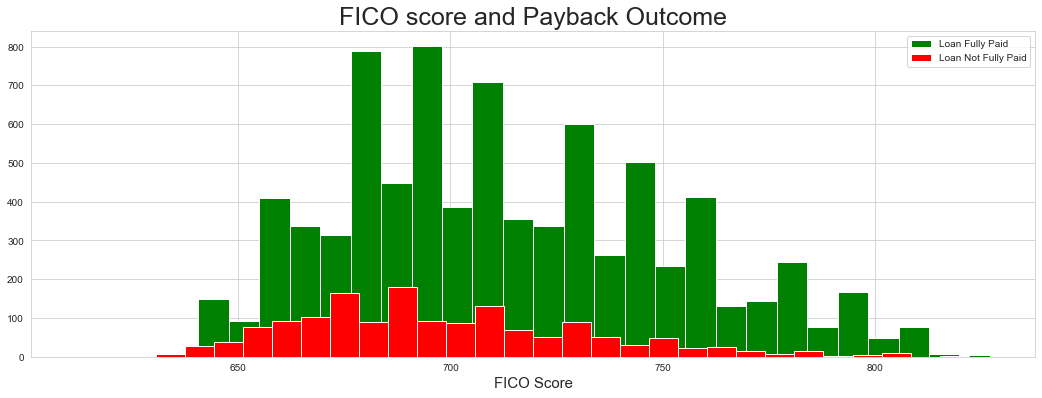

In [120]:
plt.figure(figsize=(18,6))
loans[loans['Not Paid to Date'] == 0]['fico'].hist(bins=30,color='green', label = 'Loan Fully Paid')
loans[loans['Not Paid to Date'] == 1]['fico'].hist(bins=30,color='red', label = 'Loan Not Fully Paid')
plt.xlabel('FICO Score', size=15)
plt.legend()
plt.title('FICO score and Payback Outcome', size=25)
plt.show()

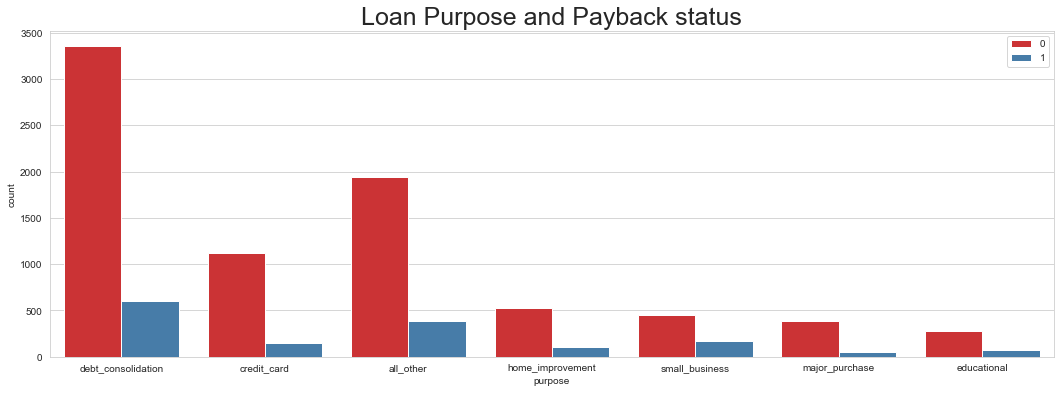

In [121]:
plt.figure(figsize=(18,6))
sns.countplot(data=loans,x='purpose',hue='Not Paid to Date',palette='Set1')
plt.title('Loan Purpose and Payback status', size=25)
plt.legend()
plt.show()

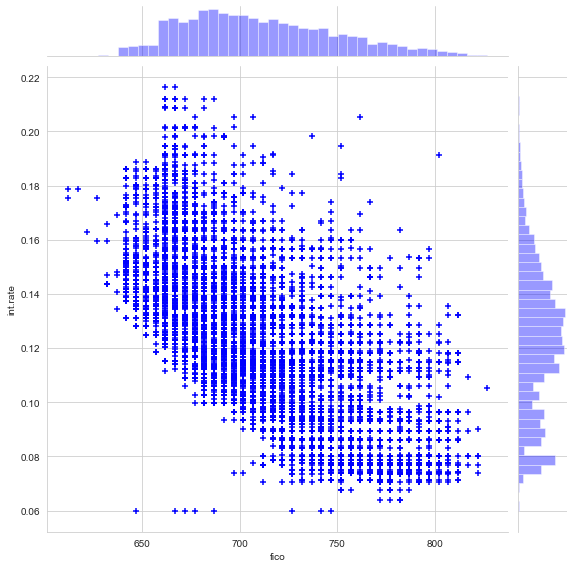

In [122]:
sns.jointplot(data=loans, x= 'fico', y='int.rate', marker = '+',color='b', ratio=8, height=8)
plt.show()

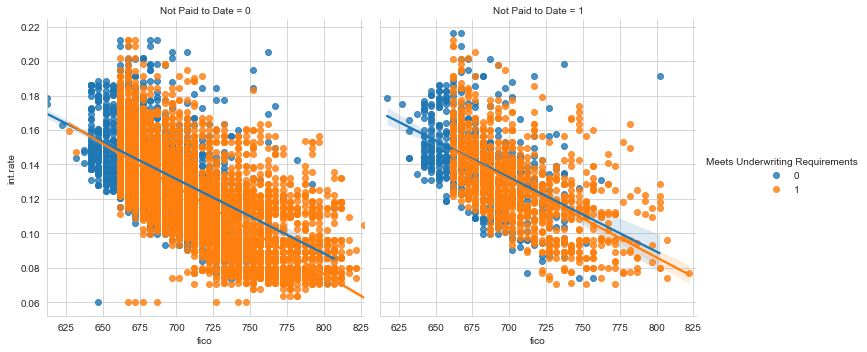

In [123]:
sns.lmplot(x='fico', y= 'int.rate',data=loans,hue='Meets Underwriting Requirements', col='Not Paid to Date')
plt.show()

### Data Prep

In [106]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [124]:
cat_feats = ['purpose']

In [126]:
df = pd.get_dummies(data=loans,columns=cat_feats,drop_first=True)

In [129]:
df

,Meets Underwriting Requirements,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,Not Paid to Date,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


### Decision Tree Model

In [133]:
X = df.drop('Not Paid to Date', axis=1)

In [134]:
y = df['Not Paid to Date']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=88)

In [139]:
dtree = DecisionTreeClassifier()

In [140]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [141]:
pred_dtree = dtree.predict(X_test)

In [145]:
print(classification_report(y_test,pred_dtree))
print('\n')
print(confusion_matrix(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2397
           1       0.23      0.25      0.24       477

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.74      2874



[[2003  394]
 [ 358  119]]


### Random Forest Model

In [146]:
ranfor = RandomForestClassifier(n_estimators=1000)

In [147]:
ranfor.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [148]:
pred_ranfor = ranfor.predict(X_test)

In [149]:
print(classification_report(y_test,pred_ranfor))
print('\n')
print(confusion_matrix(y_test, pred_ranfor))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2397
           1       0.35      0.01      0.02       477

    accuracy                           0.83      2874
   macro avg       0.59      0.50      0.47      2874
weighted avg       0.76      0.83      0.76      2874



[[2386   11]
 [ 471    6]]
